In [28]:
import os
import numpy as np
import pandas as pd
import geopandas as gpd

import rasterio
from rasterio.plot import show

from shapely.geometry import Point

import cartopy.crs as ccrs
import cartopy.feature as cf
import cartopy.feature as cfeature

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

In [13]:
# lon_min, lon_max, lat_min, lat_max, area = 6.5, 19, 36.5, 48, 'ITALY'
lon_min, lon_max, lat_min, lat_max, area, toll = 6.55, 18.95, 36.5, 47.95, 'ITALY', 0.002

In [14]:
dir_base = os.path.join('/','media','arturo','T9','Data','Italy','stations','Italy_raingauges')

In [15]:
NE_dir = os.path.join('/','media','arturo','T9','Data','shapes','Natural_Earth','NE_10m_LowReso','NE1_LR_LC_SR_W.tif')
naturalearth = rasterio.open(NE_dir)

In [54]:
veneto_dir = os.path.join('/','media','arturo','T9','Data','shapes','Europa','Italy')

if os.path.exists(veneto_dir):
    REGIONS = gpd.read_file(os.path.join(veneto_dir,'Italy_regions.geojson'))
    DEM = gpd.read_file(os.path.join(veneto_dir,'DEM','Italy_dem_800.geojson'))   
else:
    raise SystemExit(f"File not found: {veneto_dir}")

# update name of REGIONS geopandas
REGIONS = REGIONS.rename(columns={"reg_name": "Region"})
REGIONS['Region'] = REGIONS['Region'].replace('Emilia Romagna', 'Emilia-Romagna')

In [17]:
dir_input = os.path.join(dir_base, 'QC_MIX', 'METADATA', 'METADATA_INTENSE_UPDATE.csv')
METADATA = pd.read_csv(dir_input)
METADATA.head(3)

,Unnamed: 0,File,ISO,Region,Code,Name,Elevation,Or_EPSG,CRS_E,CRS_N,...,Source,TimeZon,Elevation.1,Orig_EPSG,Year_Start,Year_End,INTENSE_Resp,TimeZone,elevation_DEM,Elevation_update
0,0,IT-322_AA_6535_0060_QCv1.csv,IT-322,Alto-Adige,AA_6535,VANDOIESDISOPRA,746.0,32632.0,710057.0,5187849.0,...,Alto-Adige,UTC,NaN,NaN,NaN,NaN,NaN,NaN,745.9,746.0
1,1,IT-322_AA_5650_0060_QCv1.csv,IT-322,Alto-Adige,AA_5650,SELVADEIMOLINI,1141.0,32632.0,718972.0,5196967.0,...,Alto-Adige,UTC,NaN,NaN,NaN,NaN,NaN,NaN,1140.0,1141.0
2,2,IT-322_AA_5690_0060_QCv1.csv,IT-322,Alto-Adige,AA_5690,MOLINIDITURES,851.0,32632.0,724491.0,5198298.0,...,Alto-Adige,UTC,NaN,NaN,NaN,NaN,NaN,NaN,849.9,851.0


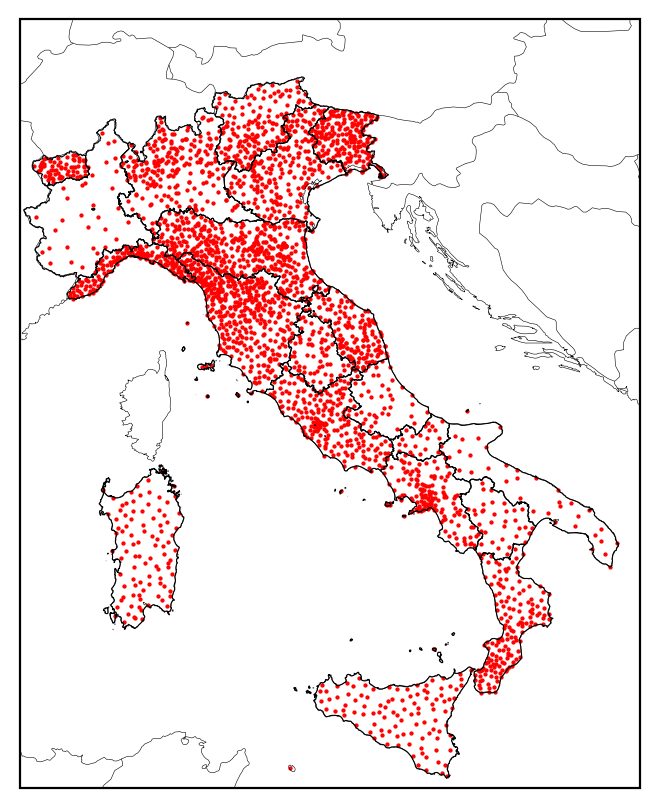

In [18]:
linewidth_map = 0.2

proj = ccrs.PlateCarree()

fig = plt.figure(figsize=(4,5),dpi=200)
gs = gridspec.GridSpec(1,1)

# ===========================================================================================================================================
ax1 = plt.subplot(gs[0, 0], projection = proj)
ax1.set_extent([lon_min, lon_max, lat_min, lat_max], crs=proj)
ax1.set_aspect('auto')
ax1.coastlines(linestyle='-',linewidth=linewidth_map,color='black',zorder=4)
ax1.add_feature(cfeature.BORDERS.with_scale('50m'),linewidth=linewidth_map,edgecolor='k',zorder=10)

REGIONS.plot(facecolor='None', ax=ax1, linewidth=0.4, zorder=10)

ax1.scatter(METADATA['Lon'], METADATA['Lat'], c='r', s=0.3, label='Rain gauges')

# gl = ax1.gridlines(crs=proj,draw_labels=True,linewidth=0.2,color='gray',alpha=0.5,linestyle='--')
# gl.top_labels = False
# gl.bottom_labels = True
# gl.left_labels = True
# gl.right_labels = False
# gl.xlabel_style = {'size': 6, 'color': 'k'}
# gl.ylabel_style = {'size': 6, 'color': 'k'}

# plt.legend(loc='upper right', fontsize=7, markerscale=5, frameon=True)

# ax1.set_title(f'Rain gauges in Italy: {len(METADATA)}', fontsize=8, loc='left', pad=2)

# ===========================================================================================================================================
# salida = os.path.join('/','home','arturo','Downloads','figure2.png')
# print(f'Export figure to: {salida}')
# plt.savefig(salida,transparent = False,bbox_inches ='tight',pad_inches = 0.1, facecolor=None)

Export figure to: ../figures/Article_down/figure2.png


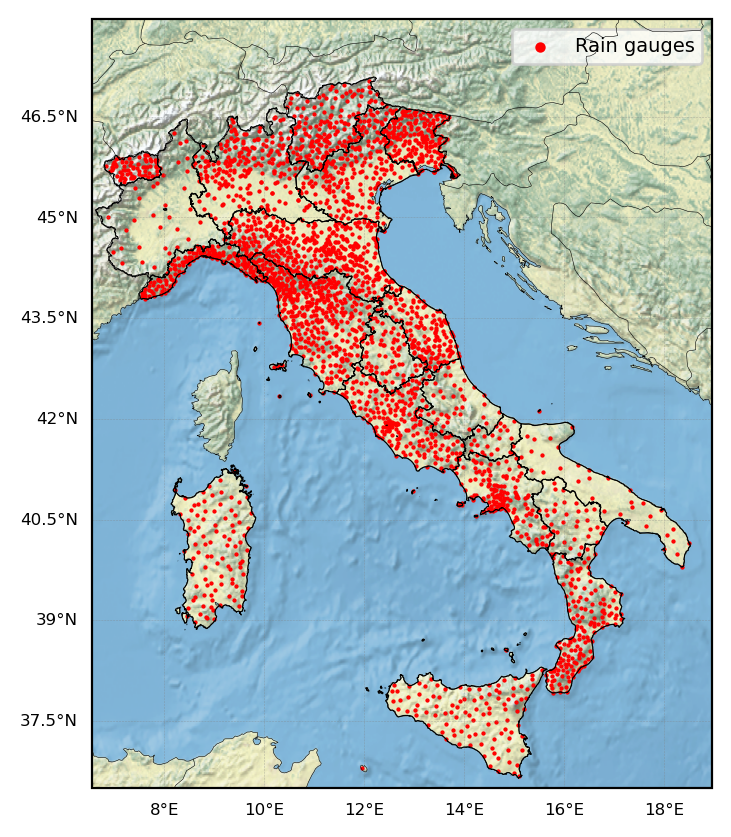

In [19]:
linewidth_map = 0.2

proj = ccrs.PlateCarree()

fig = plt.figure(figsize=(4,5),dpi=200)
gs = gridspec.GridSpec(1,1)

# ===========================================================================================================================================
ax1 = plt.subplot(gs[0, 0], projection = proj)
ax1.set_extent([lon_min, lon_max, lat_min, lat_max], crs=proj)
ax1.set_aspect('auto')
ax1.coastlines(linestyle='-',linewidth=linewidth_map,color='black',zorder=4)
ax1.add_feature(cfeature.BORDERS.with_scale('50m'),linewidth=linewidth_map,edgecolor='k',zorder=10)

show(naturalearth, ax=ax1)

REGIONS.plot(facecolor='None', ax=ax1, linewidth=0.4, zorder=10)

ax1.scatter(METADATA['Lon'], METADATA['Lat'], c='r', s=0.3, label='Rain gauges')

gl = ax1.gridlines(crs=proj,draw_labels=True,linewidth=0.2,color='gray',alpha=0.5,linestyle='--')
gl.top_labels = False
gl.bottom_labels = True
gl.left_labels = True
gl.right_labels = False
gl.xlabel_style = {'size': 6, 'color': 'k'}
gl.ylabel_style = {'size': 6, 'color': 'k'}

plt.legend(loc='upper right', fontsize=7, markerscale=5, frameon=True)

# ===========================================================================================================================================
salida = os.path.join('..','figures','Article_down','figure2.png')
print(f'Export figure to: {salida}')
plt.savefig(salida,transparent = False,bbox_inches ='tight',pad_inches = 0.1, facecolor=None)

## Rainguges and Elevation

In [20]:
Station_dir = '/media/arturo/T9/Data/Italy/stations/Italy_raingauges/QC_MIX/METADATA/METADATA_INTENSE_UPDATE.csv'
Station = pd.read_csv(Station_dir)

Station.head(3)

,Unnamed: 0,File,ISO,Region,Code,Name,Elevation,Or_EPSG,CRS_E,CRS_N,...,Source,TimeZon,Elevation.1,Orig_EPSG,Year_Start,Year_End,INTENSE_Resp,TimeZone,elevation_DEM,Elevation_update
0,0,IT-322_AA_6535_0060_QCv1.csv,IT-322,Alto-Adige,AA_6535,VANDOIESDISOPRA,746.0,32632.0,710057.0,5187849.0,...,Alto-Adige,UTC,NaN,NaN,NaN,NaN,NaN,NaN,745.9,746.0
1,1,IT-322_AA_5650_0060_QCv1.csv,IT-322,Alto-Adige,AA_5650,SELVADEIMOLINI,1141.0,32632.0,718972.0,5196967.0,...,Alto-Adige,UTC,NaN,NaN,NaN,NaN,NaN,NaN,1140.0,1141.0
2,2,IT-322_AA_5690_0060_QCv1.csv,IT-322,Alto-Adige,AA_5690,MOLINIDITURES,851.0,32632.0,724491.0,5198298.0,...,Alto-Adige,UTC,NaN,NaN,NaN,NaN,NaN,NaN,849.9,851.0


In [21]:
Elevation = Station.Elevation_update.values
Station_lat = Station.Lat.values
Station_lon = Station.Lon.values

Station_lat = Station_lat[~np.isnan(Elevation)]
Station_lon = Station_lon[~np.isnan(Elevation)]
Elevation = Elevation[~np.isnan(Elevation)]

Elevation_norm = (Elevation - np.min(Elevation)) / (np.max(Elevation) - np.min(Elevation))

/home/arturo/anaconda3/envs/AXE/lib/python3.13/site-packages/cartopy/mpl/feature_artist.py:144: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


Export figure to: ../figures/Article_down/figure2.png


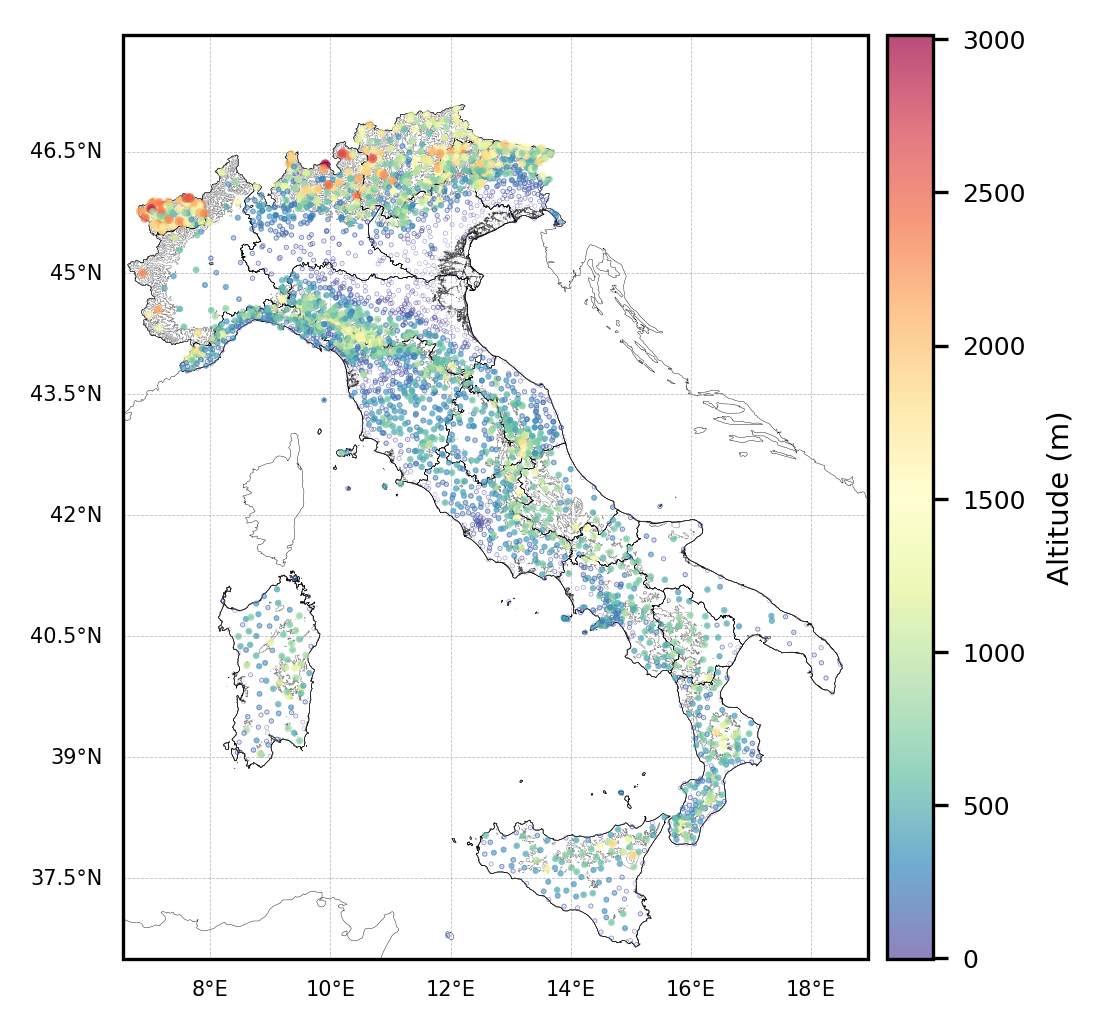

In [ ]:
elev_cmap = plt.cm.Spectral_r

proj = ccrs.PlateCarree()

fig = plt.figure(figsize=(4,4),dpi=300)
gs = gridspec.GridSpec(1,1)

# ===========================================================================================================================================
ax1 = plt.subplot(gs[0, 0], projection = proj)
ax1.set_extent([lon_min, lon_max, lat_min, lat_max], crs=proj)
ax1.add_feature(cf.COASTLINE,linewidth=0.1,color='k')
REGIONS.plot(facecolor='None', ax=ax1, linewidth=0.1, zorder=10)
DEM.plot(facecolor='None', edgecolor='k', ax=ax1, linewidth=0.1, zorder=2, alpha=0.5)

REGIONS.plot(facecolor='None', ax=ax1, linewidth=0.1, zorder=10)

a1 = ax1.scatter(Station_lon, Station_lat, c=Elevation, s=Elevation_norm*2, alpha=0.7, label='Rain gauges', cmap=elev_cmap, norm=None, zorder=20)

gl = ax1.gridlines(crs=proj,draw_labels=True,linewidth=0.2,color='gray',alpha=0.5,linestyle='--')
gl.top_labels = False
gl.bottom_labels = True
gl.left_labels = True
gl.right_labels = False
gl.xlabel_style = {'size': 5, 'color': 'k'}
gl.ylabel_style = {'size': 5, 'color': 'k'}

cbar = plt.colorbar(a1, ax=ax1, fraction=0.05, pad=0.02)
cbar.ax.tick_params(labelsize=6) 
cbar.set_label("Altitude (m)", fontsize=7, labelpad=5)  
# label = cbar.ax.set_xlabel("Altitude (m)", fontsize=6, labelpad=4)
# label.set_horizontalalignment("right")  # Alinea a la derecha
# label.set_x(3.2) 

# ===========================================================================================================================================
salida = os.path.join('..','figures','Article_down','figure2.png')
print(f'Export figure to: {salida}')
# plt.savefig(salida,transparent = False,bbox_inches ='tight',pad_inches = 0.1, facecolor=None)

## Statistics

In [60]:
def obtener_estadisticas_estaciones(regions_gdf, station_lon, station_lat):
    """
    Calcula estadísticas de estaciones para cada región usando EPSG:3003 (Monte Mario/Italy zone 1)
    """
    
    # Crear GeoDataFrame con las estaciones
    estaciones_gdf = gpd.GeoDataFrame(
        geometry=[Point(lon, lat) for lon, lat in zip(station_lon, station_lat)],
        crs=regions_gdf.crs
    )
    
    # Realizar la unión espacial
    estaciones_en_regiones = gpd.sjoin(estaciones_gdf, regions_gdf, how='left', predicate='within')
    
    # CALCULAR ÁREA USANDO EPSG:3003 (Monte Mario/Italy zone 1)
    print(f"CRS original: {regions_gdf.crs}")
    
    try:
        regions_3003 = regions_gdf.to_crs('EPSG:3003')
        # Convertir a entero directamente
        regions_gdf['area_km2'] = (regions_3003.geometry.area / 1e6).astype(int)
        print("Áreas calculadas usando EPSG:3003 (Monte Mario/Italy zone 1)")
    except Exception as e:
        print(f"Error al convertir a EPSG:3003: {e}")
        try:
            regions_utm = regions_gdf.to_crs('EPSG:32632')
            regions_gdf['area_km2'] = (regions_utm.geometry.area / 1e6).astype(int)
            print("Áreas calculadas usando EPSG:32632 (UTM zone 32N)")
        except Exception as e2:
            print(f"Error al convertir a EPSG:32632: {e2}")
            regions_gdf['area_km2'] = (regions_gdf.geometry.area * 111 * 111).astype(int)
            print("Áreas calculadas usando aproximación geográfica")
    
    # Contar estaciones por región
    conteo_estaciones = estaciones_en_regiones.groupby('Region').size().reset_index(name='num_estaciones')
    
    # Unir con el GeoDataFrame original
    resultado = regions_gdf.merge(conteo_estaciones, on='Region', how='left')
    
    # Rellenar NaN con 0 para regiones sin estaciones y convertir a entero
    resultado['num_estaciones'] = resultado['num_estaciones'].fillna(0).astype(int)
    
    # Calcular densidad (estaciones por km²) y redondear
    resultado['densidad_estaciones_km2'] = (resultado['num_estaciones'] / resultado['area_km2']).round(4)
    
    # Calcular densidad por cada 1000 km² y redondear
    resultado['densidad_cada_1000km2'] = ((resultado['num_estaciones'] / resultado['area_km2']) * 1000).round(2)
    
    return resultado

In [61]:
resultado_final = obtener_estadisticas_estaciones(REGIONS, Station_lon, Station_lat)
resultado_final

CRS original: EPSG:4326
Áreas calculadas usando EPSG:3003 (Monte Mario/Italy zone 1)


,Region,reg_istat_code_num,reg_istat_code,geometry,area_km2,num_estaciones,densidad_estaciones_km2,densidad_cada_1000km2
0,Piedmont,1,01,"POLYGON ((7.13605 45.27996, 7.13601 45.2804, 7...",25384,38,0.0015,1.50
1,Aosta Valley,2,02,"POLYGON ((7.73455 45.92365, 7.7359 45.92744, 7...",3258,69,0.0212,21.18
2,Lombardy,3,03,"MULTIPOLYGON (((8.57964 45.75172, 8.57532 45.7...",23855,227,0.0095,9.52
3,Trentino,4,04,"POLYGON ((12.01396 46.55091, 12.01376 46.55077...",13608,154,0.0113,11.32
4,Veneto,5,05,"POLYGON ((10.63538 45.53543, 10.63228 45.56846...",18344,213,0.0116,11.61
5,Friuli-Venezia Giulia,6,06,"MULTIPOLYGON (((13.51691 46.38301, 13.5175 46....",7934,200,0.0252,25.21
6,Liguria,7,07,"MULTIPOLYGON (((7.55166 43.89429, 7.56264 43.9...",5414,152,0.0281,28.08
7,Emilia-Romagna,8,08,"MULTIPOLYGON (((9.33258 44.73504, 9.33167 44.7...",22500,416,0.0185,18.49
8,Tuscany,9,09,"MULTIPOLYGON (((9.89786 44.16359, 9.89451 44.1...",22984,403,0.0175,17.53
9,Umbria,10,10,"MULTIPOLYGON (((13.15849 42.65425, 13.15764 42...",8464,65,0.0077,7.68


/home/arturo/anaconda3/envs/AXE/lib/python3.13/site-packages/cartopy/mpl/feature_artist.py:144: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '
/home/arturo/anaconda3/envs/AXE/lib/python3.13/site-packages/cartopy/mpl/feature_artist.py:144: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


Export figure to: ../figures/Article_down/rainguage_density.png


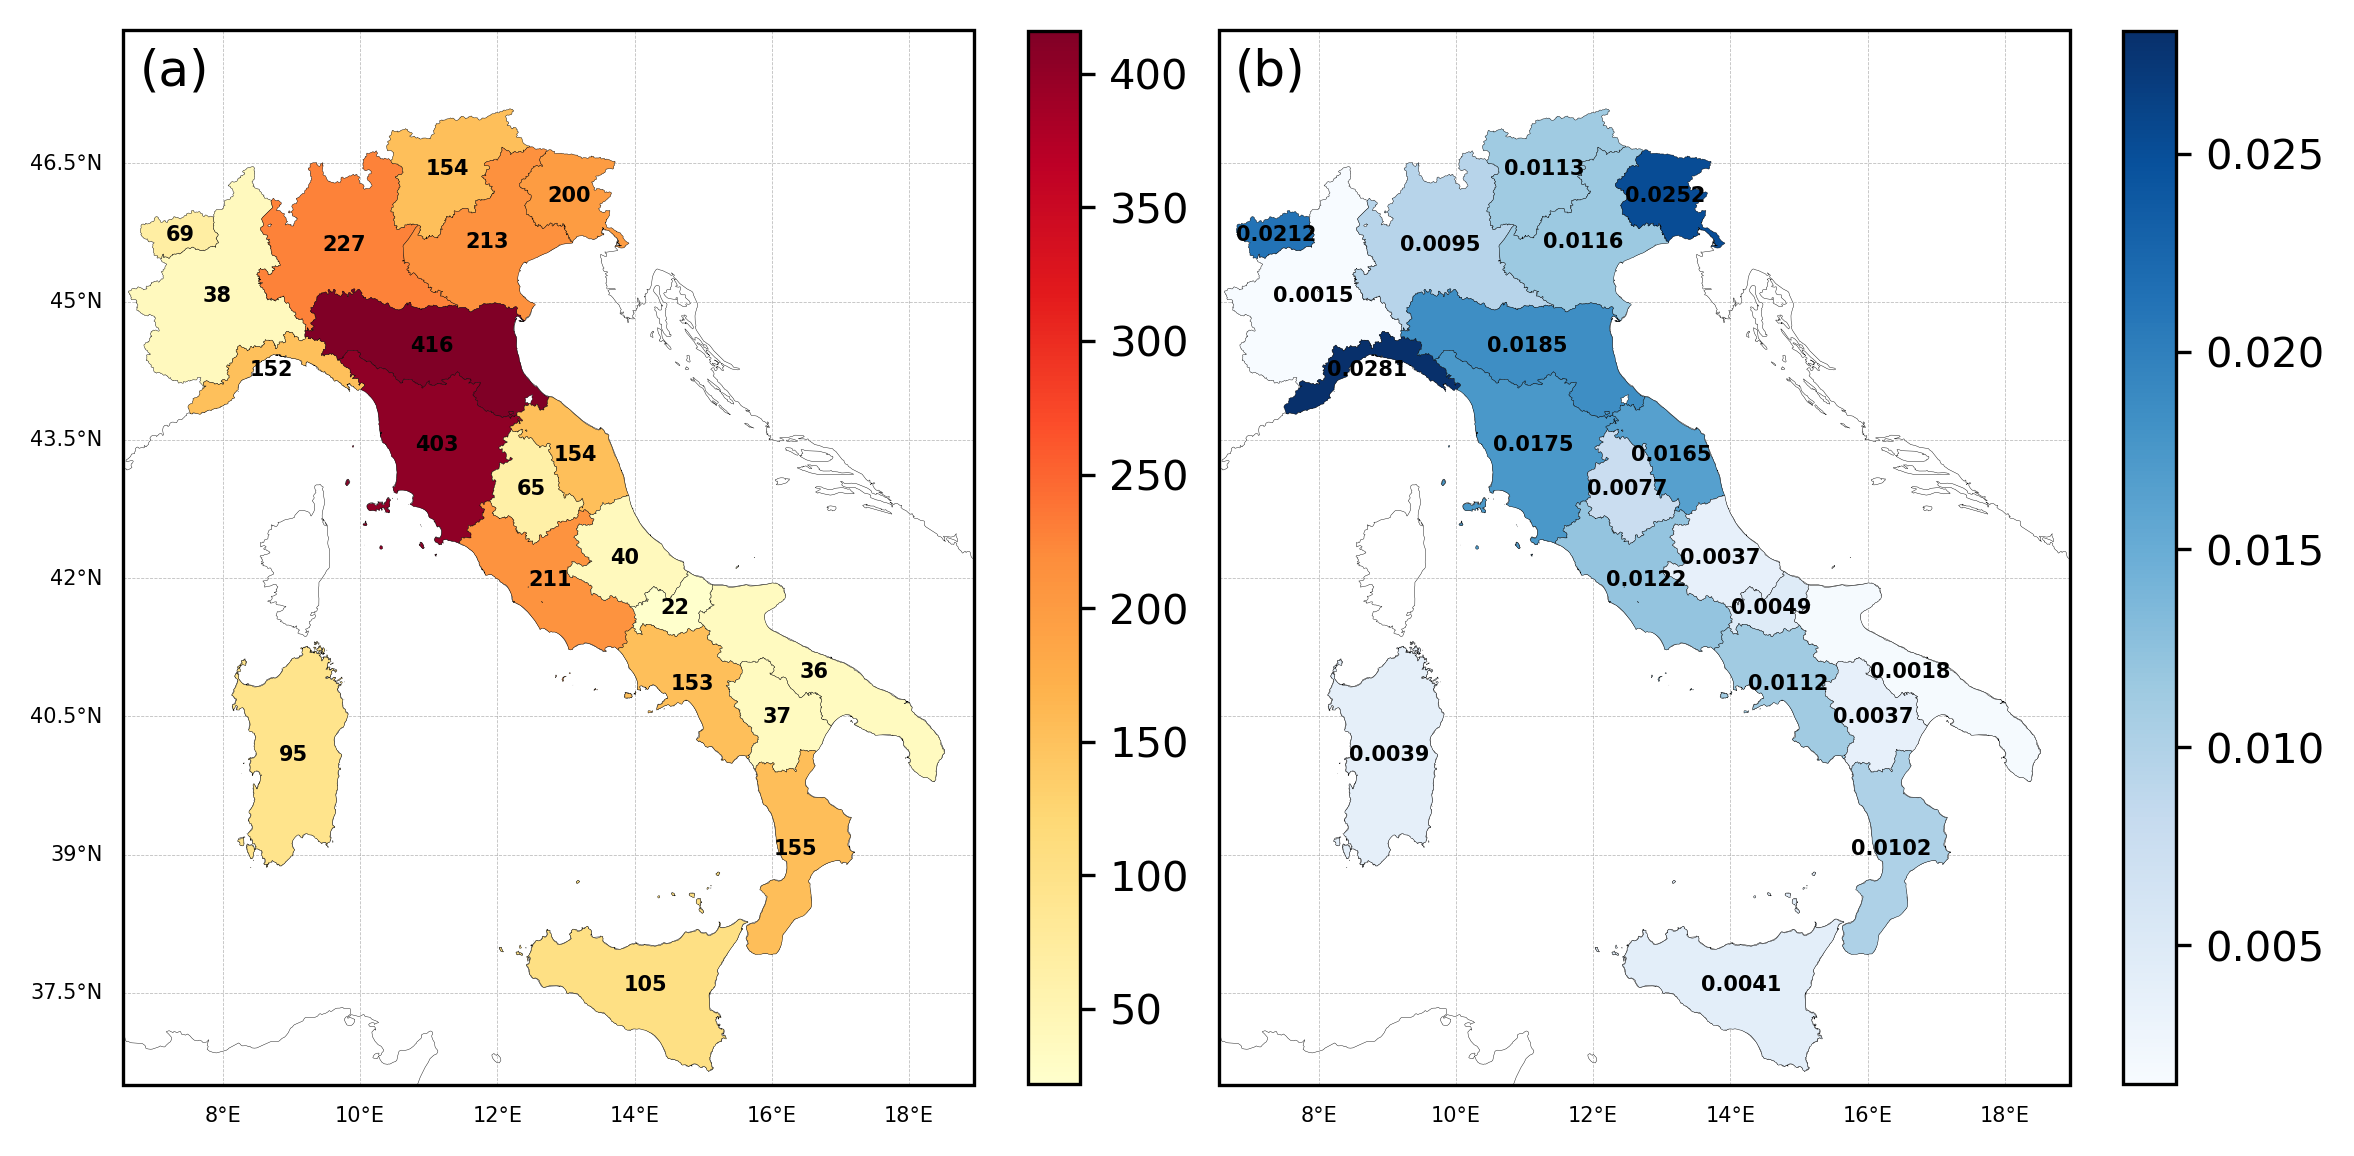

In [148]:
proj = ccrs.PlateCarree()

fig = plt.figure(figsize=(8,6), dpi=300)
gs = gridspec.GridSpec(1,2)

# ==============================================================================================
ax1 = plt.subplot(gs[0, 0], projection=proj)
ax1.set_extent([lon_min, lon_max, lat_min, lat_max], crs=proj)
ax1.add_feature(cf.COASTLINE, linewidth=0.1, color='k')

vmin = resultado_final['num_estaciones'].min()
vmax = resultado_final['num_estaciones'].max()

resultado_final.plot(column='num_estaciones',
                    ax=ax1,
                    cmap='YlOrRd',
                    linewidth=0.1,
                    edgecolor='black',
                    legend=True,
                    legend_kwds={
                        'shrink': 0.65,
                        'orientation': 'vertical'},
                    vmin=vmin, 
                    vmax=vmax,
                    zorder=11)

for idx, row in resultado_final.iterrows():
    centroid = row.geometry.centroid
    ax1.text(centroid.x, centroid.y, str(row['num_estaciones']), 
            fontsize=5, ha='center', va='center', weight='bold',
            transform=proj, zorder=20)

gl = ax1.gridlines(crs=proj,draw_labels=True,linewidth=0.2,color='gray',alpha=0.5,linestyle='--')
gl.top_labels = False
gl.bottom_labels = True
gl.left_labels = True
gl.right_labels = False
gl.xlabel_style = {'size': 5, 'color': 'k'}
gl.ylabel_style = {'size': 5, 'color': 'k'}

ax1.text(7.3, 47.5, '(a)', 
            fontsize=12, ha='center', va='center',
            transform=proj, zorder=20)

# ==============================================================================================
ax1 = plt.subplot(gs[0, 1], projection=proj)
ax1.set_extent([lon_min, lon_max, lat_min, lat_max], crs=proj)
ax1.add_feature(cf.COASTLINE, linewidth=0.1, color='k')

vmin = resultado_final['densidad_estaciones_km2'].min()
vmax = resultado_final['densidad_estaciones_km2'].max()

resultado_final.plot(column='densidad_estaciones_km2',
                    ax=ax1,
                    cmap='Blues',
                    linewidth=0.1,
                    edgecolor='black',
                    legend=True,
                    legend_kwds={
                        'shrink': 0.65,
                        'orientation': 'vertical'},
                    vmin=vmin, 
                    vmax=vmax,
                    zorder=11)

for idx, row in resultado_final.iterrows():
    centroid = row.geometry.centroid
    ax1.text(centroid.x, centroid.y, str(row['densidad_estaciones_km2']), 
            fontsize=5, ha='center', va='center', weight='bold',
            transform=proj, zorder=20)

ax1.text(7.3, 47.5, '(b)', 
            fontsize=12, ha='center', va='center',
            transform=proj, zorder=20)

gl = ax1.gridlines(crs=proj,draw_labels=True,linewidth=0.2,color='gray',alpha=0.5,linestyle='--')
gl.top_labels = False
gl.bottom_labels = True
gl.left_labels = False
gl.right_labels = False
gl.xlabel_style = {'size': 5, 'color': 'k'}
gl.ylabel_style = {'size': 5, 'color': 'k'}

# ===========================================================================================================================================
plt.subplots_adjust(left=0.05, bottom=0.05, right=0.95, top=0.95, wspace=0.03, hspace=0.05)
salida = os.path.join('..','figures','Article_down','rainguage_density.png')
print(f'Export figure to: {salida}')
plt.savefig(salida,transparent = False,bbox_inches ='tight',pad_inches = 0.1, facecolor=None)